# predicting the Quality of the redwine

In [1]:
#Importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [15]:
#importing the dataset
data=pd.read_csv("winequality.csv")

In [16]:
#viewing the dataset
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [17]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


# description of the data and the Data Exploration

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [22]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [23]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [24]:
data.shape

(1599, 12)

In [25]:
len(data)

1599

In [26]:
#checking is there any null values
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [31]:
#Datavisualization


In [37]:
data.value_counts()[:10]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  quality
7.5            0.510             0.02         1.7             0.084      13.0                 31.0                  0.99538  3.36  0.54       10.5     6          4
6.7            0.460             0.24         1.7             0.077      18.0                 34.0                  0.99480  3.39  0.60       10.6     6          4
7.2            0.360             0.46         2.1             0.074      24.0                 44.0                  0.99534  3.40  0.85       11.0     7          4
               0.695             0.13         2.0             0.076      12.0                 20.0                  0.99546  3.29  0.54       10.1     5          4
8.3            0.650             0.10         2.9             0.089      17.0                 40.0                  0.99803  3.29  0.55       9.5      5          3
11.5           0.180 

<AxesSubplot:>

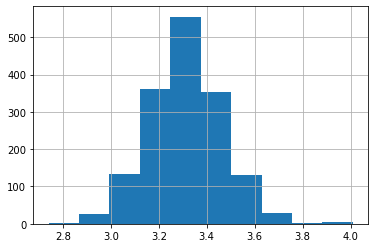

In [40]:
data["pH"].hist()

<BarContainer object of 1599 artists>

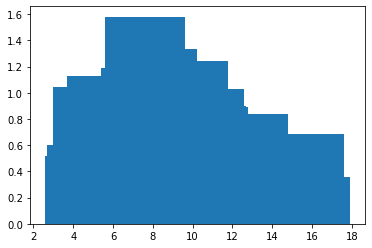

In [48]:
plt.bar(data["fixed acidity"],data["volatile acidity"],width=4)

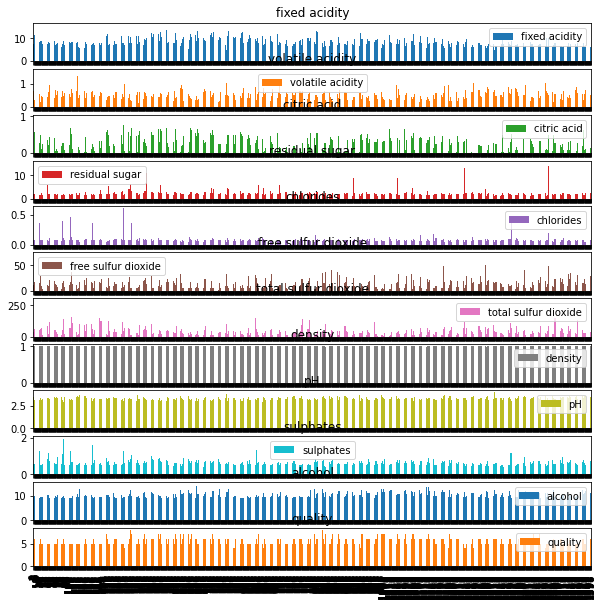

In [49]:
data.plot.bar(subplots=True,figsize=(10,10));

<AxesSubplot:>

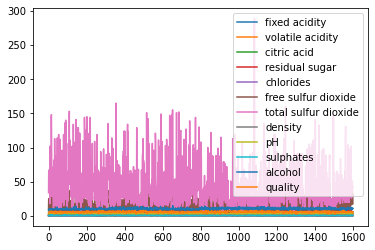

In [51]:
data.plot()

<BarContainer object of 1599 artists>

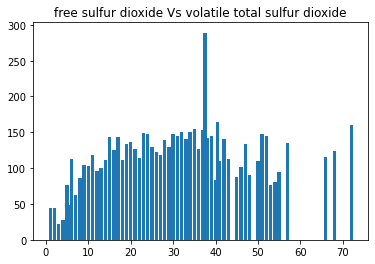

In [55]:
fig,ax=plt.subplots()
ax.set(title="free sulfur dioxide Vs volatile total sulfur dioxide")
ax.bar(data["free sulfur dioxide"],data["total sulfur dioxide"])

<AxesSubplot:>

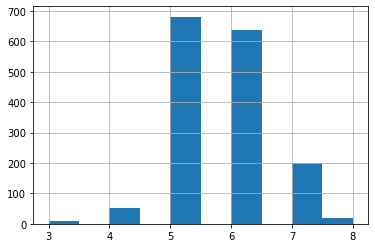

In [56]:
data["quality"].hist()

In [57]:
corr_matrix=data.corr()

In [58]:
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


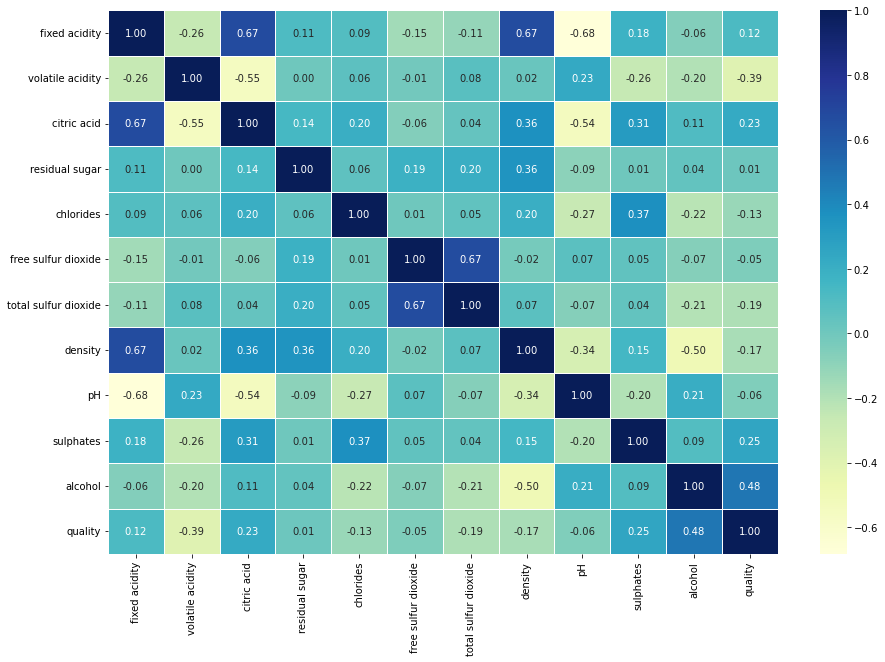

In [59]:

fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidth=0.5,
              fmt=".2f",cmap="YlGnBu")

<AxesSubplot:xlabel='fixed acidity', ylabel='volatile acidity'>

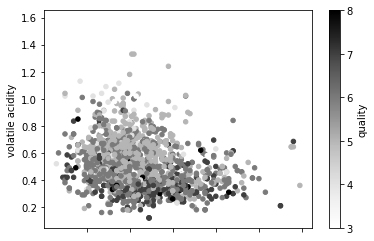

In [65]:
data.plot(kind="scatter",
            x="fixed acidity",
            y="volatile acidity",
            c="quality")

<AxesSubplot:xlabel='density', ylabel='pH'>

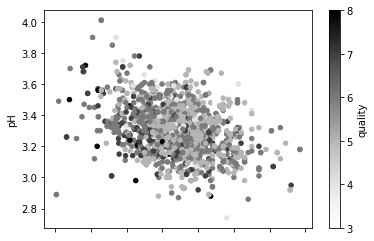

In [66]:
data.plot(kind="scatter",
            x="density",
            y="pH",
            c="quality")

In [67]:
#dividing the data into the x and y that is features and the labels

In [68]:
x=data.drop("quality",axis=1)

In [69]:
y=data["quality"]

In [70]:
#viewing the x and y

In [71]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [72]:
y[:10]

0    5
1    5
2    5
3    6
4    5
5    5
6    5
7    7
8    7
9    5
Name: quality, dtype: int64

In [73]:
#Now dividing it into the training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [74]:
#viewing the training and testing sets shapes
x_train.shape,y_train.shape

((1279, 11), (1279,))

In [75]:
x_test.shape,y_test.shape

((320, 11), (320,))

In [76]:
#Prediction of the data is the continuous one ,so it is the regresion problem

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
model_1=LinearRegression()

In [80]:
#fitting the data on the training data
model_1.fit(x_train,y_train)

LinearRegression()

In [81]:
#Now predictng the quality of the wine by using the some of the Evolution metrics used in the Regression problem

In [82]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_squared_log_error

In [85]:
y_pred=model_1.predict(x_test)

In [87]:
y_pred[:10]

array([5.34666441, 5.05631345, 5.66446972, 5.46451484, 5.72518476,
       5.27928659, 5.03421667, 5.12623347, 5.74534288, 5.68665032])

In [88]:
mse=mean_squared_error(y_test,y_pred)

In [89]:
mse

0.3900251439639543

In [90]:
mae=mean_absolute_error(y_test,y_pred)

In [91]:
mae

0.5035304415524375

In [92]:
r_2=r2_score(y_test,y_pred)

In [93]:
r_2

0.40318034127962277

In [94]:
msle=mean_squared_log_error(y_test,y_pred)

In [95]:
msle

0.008915146923222008

In [96]:
#We have huge amount of data it is better to check woth the RandomForest

In [98]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
model_2=RandomForestRegressor()
model_2.fit(x_train,y_train)

RandomForestRegressor()

In [100]:
#Now prediction of the data

In [101]:
y_pred_1=model_2.predict(x_test)

In [102]:
y_pred_1[:10]

array([5.3 , 5.1 , 5.43, 5.2 , 5.98, 5.09, 5.1 , 4.89, 6.03, 5.9 ])

In [103]:
mse_RF=mean_squared_error(y_test,y_pred_1)

In [105]:
mse_RF

0.3116396875

In [107]:
mae_RF=mean_absolute_error(y_test,y_pred_1)

In [108]:
mae_RF

0.42871875

In [109]:
r_2_RF=r2_score(y_test,y_pred_1)

In [110]:
r_2_RF

0.5231264065512038

In [111]:
msle_RF=mean_squared_log_error(y_test,y_pred_1)

In [112]:
msle_RF

0.0073291217169448915

In [114]:
model_1.score(x_test,y_test)

0.40318034127962277

In [115]:
model_2.score(x_test,y_test)

0.5231264065512038